In [1]:
def piecewise_linear_interpolation(x, partition, f):
    n = len(partition)
    
    # Ensure x is within the bounds of the partition
    if x < partition[0] or x > partition[-1]:
        raise ValueError("x is out of the interpolation interval.")
    
    # Find the subinterval [xi, xi+1] such that xi <= x <= xi+1.
    for i in range(n - 1):
        if partition[i] <= x <= partition[i+1]:
            x0 = partition[i]
            x1 = partition[i+1]
            # Apply the linear interpolation formula
            return f(x0) + (f(x1) - f(x0)) / (x1 - x0) * (x - x0)
    
    # This should not occur if x is within [partition[0], partition[-1]]
    raise ValueError("x is not within the partition interval.")

if __name__ == '__main__':
    import math

    # Example for Part (b)i:
    print("Part (b)i:")
    f_i = lambda x: math.exp(2 * x)
    partition_i = [0, 0.25, 0.5, 0.75]
    test_points_i = [0.43, 0.67]
    for x in test_points_i:
        interp_val = piecewise_linear_interpolation(x, partition_i, f_i)
        true_val = f_i(x)
        error = abs(interp_val - true_val)
        print(f"x = {x:.2f}: Interpolation = {interp_val:.6f}, True = {true_val:.6f}, Error = {error:.6f}")

    # Example for Part (b)ii:
    print("\nPart (b)ii:")
    f_ii = lambda x: math.log(math.exp(x) + 2)
    partition_ii = [0, 0.1, 0.2, 0.3, 0.4]
    test_points_ii = [0.25, 1/3]
    for x in test_points_ii:
        interp_val = piecewise_linear_interpolation(x, partition_ii, f_ii)
        true_val = f_ii(x)
        error = abs(interp_val - true_val)
        print(f"x = {x:.6f}: Interpolation = {interp_val:.6f}, True = {true_val:.6f}, Error = {error:.6f}")


Part (b)i:
x = 0.43: Interpolation = 2.418805, True = 2.363161, Error = 0.055644
x = 0.67: Interpolation = 3.917399, True = 3.819044, Error = 0.098355

Part (b)ii:
x = 0.250000: Interpolation = 1.189368, True = 1.189070, Error = 0.000298
x = 0.333333: Interpolation = 1.222754, True = 1.222484, Error = 0.000269


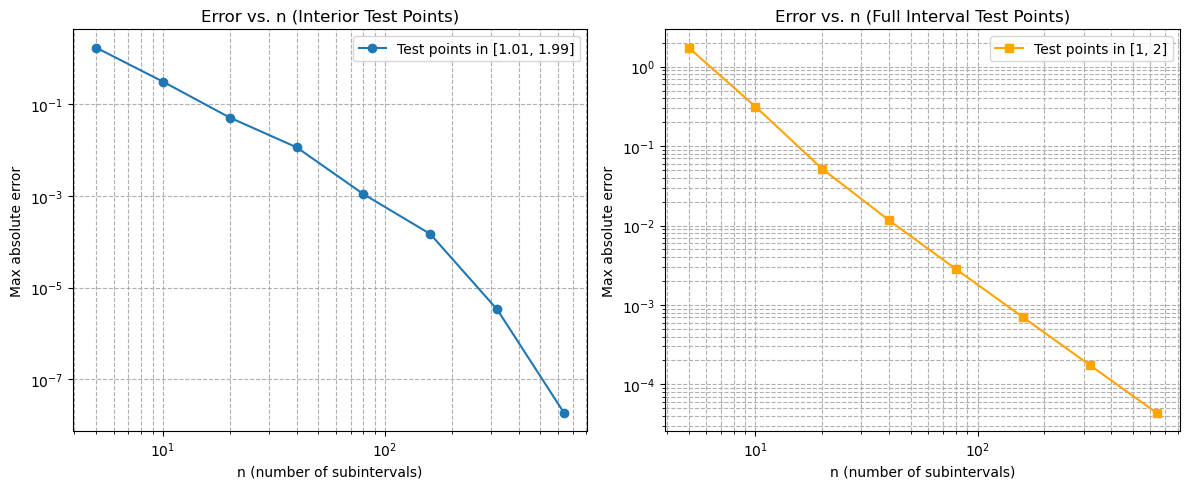

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the function to interpolate
def f(x):
    return np.sin(20 * x)

# For reproducibility of the random test points
np.random.seed(0)

# Define a range of n values (n = number of subintervals; there will be n+1 nodes)
n_values = np.array([5, 10, 20, 40, 80, 160, 320, 640])

# Lists to store the maximum errors for the two test-point strategies:
max_error_inside = []  # Test points uniformly sampled from [1.01, 1.99]
max_error_full   = []  # Test points uniformly sampled from [1, 2]

# Loop over each n value
for n in n_values:
    # Create an equispaced partition of [1,2] with n+1 nodes
    x_nodes = np.linspace(1, 2, n + 1)
    y_nodes = f(x_nodes)
    
    # Construct the natural cubic spline (using bc_type='natural')
    cs = CubicSpline(x_nodes, y_nodes, bc_type='natural')
    
    # --- Part (a): Test on points in [1.01, 1.99] ---
    # Generate 10^5 random test points in [1.01, 1.99]
    test_points_inside = 1.01 + (1.99 - 1.01) * np.random.rand(100000)
    spline_vals_inside = cs(test_points_inside)
    true_vals_inside = f(test_points_inside)
    max_err_inside = np.max(np.abs(spline_vals_inside - true_vals_inside))
    max_error_inside.append(max_err_inside)
    
    # --- Part (c): Test on points in [1, 2] (the full interval) ---
    test_points_full = 1 + (2 - 1) * np.random.rand(100000)
    spline_vals_full = cs(test_points_full)
    true_vals_full = f(test_points_full)
    max_err_full = np.max(np.abs(spline_vals_full - true_vals_full))
    max_error_full.append(max_err_full)

# Convert error lists to NumPy arrays for convenience
max_error_inside = np.array(max_error_inside)
max_error_full = np.array(max_error_full)

# --- Plotting the maximum errors as a function of n (log-log plots) ---
plt.figure(figsize=(12, 5))

# Plot for test points in [1.01, 1.99]
plt.subplot(1, 2, 1)
plt.loglog(n_values, max_error_inside, 'o-', label='Test points in [1.01, 1.99]')
plt.xlabel('n (number of subintervals)')
plt.ylabel('Max absolute error')
plt.title('Error vs. n (Interior Test Points)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Plot for test points in [1, 2]
plt.subplot(1, 2, 2)
plt.loglog(n_values, max_error_full, 's-', color='orange', label='Test points in [1, 2]')
plt.xlabel('n (number of subintervals)')
plt.ylabel('Max absolute error')
plt.title('Error vs. n (Full Interval Test Points)')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()
plt.show()
